<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [3]:
duplicate_rows = df[df.duplicated()]

In [9]:
df = df.drop_duplicates()

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [11]:
df['Country'].isna().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11398 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null  obj

Verify if duplicates were actually dropped.


In [ ]:
# your code goes here


## Finding Missing values


Find the missing values for all columns.


In [1]:
# your code goes here


Find out how many rows are missing in the column 'WorkLoc'


In [ ]:
# your code goes here

## Imputing missing values


Find the  value counts for the column WorkLoc.


In [ ]:
# your code goes here


Identify the value that is most frequent (majority) in the WorkLoc column.


In [2]:
#make a note of the majority value here, for future reference
#

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [ ]:
# your code goes here


After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [ ]:
# your code goes here


In [13]:
df['Employment'].value_counts()

Employment
Employed full-time    10968
Employed part-time      430
Name: count, dtype: int64

In [14]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering          6953
Information systems, information technology, or system administration     794
Another engineering discipline (ex. civil, electrical, mechanical)        759
Web development or web design                                             410
A natural science (ex. biology, chemistry, physics)                       403
Mathematics or statistics                                                 372
A business discipline (ex. accounting, finance, marketing)                244
A social science (ex. anthropology, psychology, political science)        210
A humanities discipline (ex. literature, history, philosophy)             207
Fine arts or performing arts (ex. graphic design, music, studio art)      161
I never declared a major                                                  124
A health science (ex. nursing, pharmacy, radiology)                        24
Name: count, dtype: int64

In [15]:
df['CompFreq'].nunique()

3

In [17]:
df[df['CompFreq'] == 'Yearly'].shape[0]

6073

In [25]:
df['Age'].median()

29.0

In [37]:
women_df = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp
df['ConvertedComp'].median()

57745.0

In [34]:
# Assuming 'df' is your DataFrame
# Calculate the first quartile (Q1) and third quartile (Q3) of the 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower bound for outliers below Q1
lower_bound = Q1 - 1.5 * IQR

# Count the number of outliers below Q1
num_outliers_below_Q1 = df[df['Age'] < lower_bound].shape[0]

print("Number of outliers below Q1:", num_outliers_below_Q1)


Number of outliers below Q1: 0


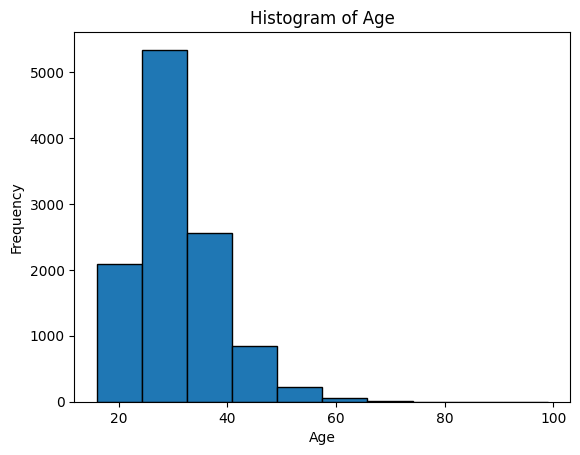

In [28]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Age' is the column containing age data
# Plot the histogram of age data
plt.hist(df['Age'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


In [35]:
import numpy as np

# Assuming 'df' is your DataFrame

# Calculate z-scores for ConvertedComp
z_scores = np.abs((df['ConvertedComp'] - df['ConvertedComp'].mean()) / df['ConvertedComp'].std())

# Define a threshold for identifying outliers (e.g., z-score > 3)
threshold = 3

# Filter the DataFrame to exclude rows with outliers
df_no_outliers = df[z_scores <= threshold]

# Calculate the mean ConvertedComp after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)


Mean ConvertedComp after removing outliers: 94163.72674531039


## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [ ]:
# your code goes here


Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
